In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from clustertools.load_data import load_fuzzy_data

In [10]:
data = load_fuzzy_data(scale=True)
data = data[::3,:]

Constructing squared distance matrix
terminated by break condition
21 iterations until termination.
Finished after 0:00:01.837382


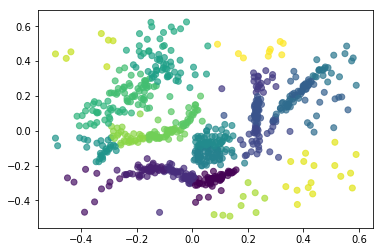

In [11]:
from clustertools.models.similarity import AffinityPropagation

affinity_object = AffinityPropagation(data,max_iter=100, damp=0.3, similarity_measure='squared_distance', 
                                        metric='euclidean', sensitivity_weights='median', n_break_storage=5)
affinity_object.fit()

plt.scatter(data[:,0],data[:,1],c=affinity_object.cluster_labels,alpha=.7)

terminated by break condition
13 iterations until termination.
Finished after 0:00:00.024795
max within-cluster distance to center: 0.517337
mean within-cluster distance to center: 0.127585
sum of within cluster squared errors: 17.062291


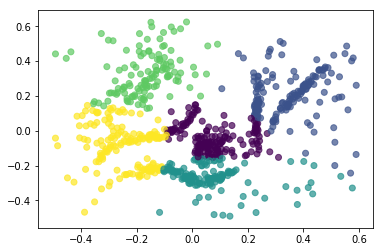

In [12]:
from clustertools.models.distance import KMeans

kmeans_object = KMeans(data, k=5, max_iter=150, method='kmeans++', metric='euclidean', 
                           atol=1e-8, rtol=1e-8, verbose=True)

kmeans_object.fit()

plt.scatter(data[:,0],data[:,1],c=kmeans_object.cluster_labels,alpha=.7)

Bandwidth estimation only works well for scaled data, preprocess the data first using scale_data() if that is not the case.
124 iterations until termination.
Used bandwidth: 0.321830
Finished after 3.762749486815096
Number of clusters found: 80.000000
There is/are 49.000000 outliers
Max within cluster distance to center: 14.530459
Mean within cluster distance to center: 0.491794
Sum of within cluster squared errors: 4617.641692


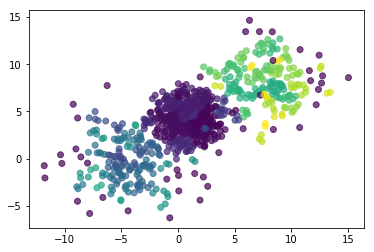

In [13]:
from clustertools.models.density import MeanShift
from clustertools.load_data import load_uneven_blobs
data = load_uneven_blobs(scale=True)

mean_shift_object = MeanShift(data)

mean_shift_object.fit()

plt.scatter(data[:,0],data[:,1],c=mean_shift_object._cluster_labels,alpha=.7)

#### Consensus clustering

Computing generalized Laplacian eigenproblem


KMeans initialization on eigenvectors...
terminated by break condition
3 iterations until termination.
Finished after 0:00:00.022713
max within-cluster distance to center: 60.736801
mean within-cluster distance to center: 11.648134
sum of within cluster squared errors: 271727.274368
KMeans terminated. 

Finished after 0:00:02.704393
Consensus clustering terminated.
Finished after 0:00:03.192033
ANMI (average normalized mutual information) of consensus with clusterings: 0.807


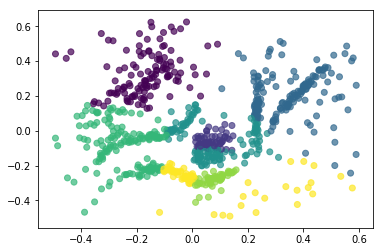

In [16]:
from clustertools.models import consensus

data = load_fuzzy_data(scale=True)
data = data[::3,:]

clusterings = [affinity_object, kmeans_object]
recluster_what = 'points' # or 'clusters'
how = 'spectral' # or 'hierarchical'
k = 7 # how many clusters to produce

consensus_obj = consensus.Consensus(clusterings=clusterings, k=k, recluster_what=recluster_what, how=how)
consensus_obj.fit()

plt.scatter(data[:,0],data[:,1],c=consensus_obj._cluster_labels,alpha=.7)